<a href="https://colab.research.google.com/github/samir-surjuse/BlinkIT-Grocery-Data/blob/main/Laptop_prices_samir_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laptop Prices Analysis Basic

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# File upload
file_path = "/content/drive/MyDrive/My Files/laptop_prices.csv"
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [ ]:
df.shape

(1275, 23)

## Data Cleaning

In [ ]:
# Column Name Standerdise
df.columns = df.columns.str.strip().str.replace(" ", "_")
print(df.columns.tolist())

['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


In [ ]:
before = len(df)
df = df.drop_duplicates().reset_index(drop=True)
after = len(df)
print(f"Removed {before - after} duplicates")
print(len(df))

Removed 0 duplicates
1275


In [ ]:
num_cols = ["Inches","Ram","Weight","Price_euros","ScreenW","ScreenH","CPU_freq",
            "PrimaryStorage","SecondaryStorage"]

for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
print(num_cols)

['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']


In [ ]:
bin_map = {"Yes":1,"No":0,"yes":1,"no":0,"True":1,"False":0}
for c in ["Touchscreen","IPSpanel","RetinaDisplay"]:
    if c in df.columns:
        df[c] = df[c].map(bin_map).fillna(df[c])
print(bin_map)

{'Yes': 1, 'No': 0, 'yes': 1, 'no': 0, 'True': 1, 'False': 0}


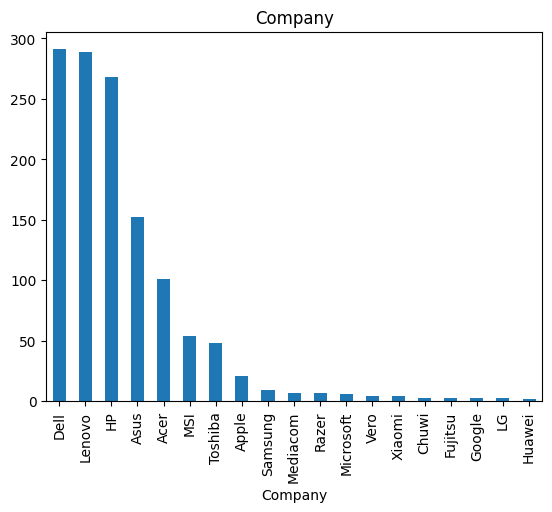

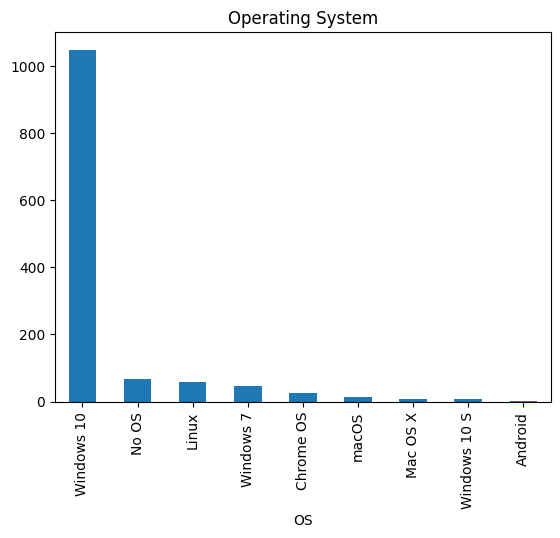

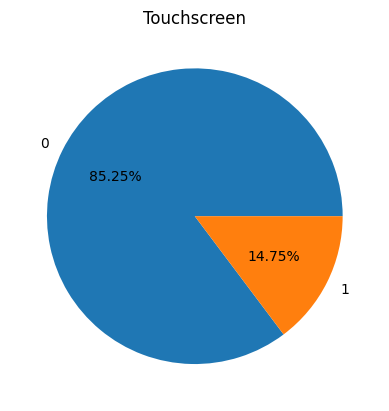

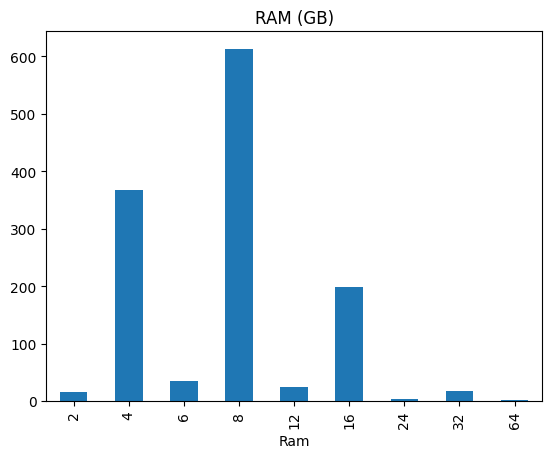

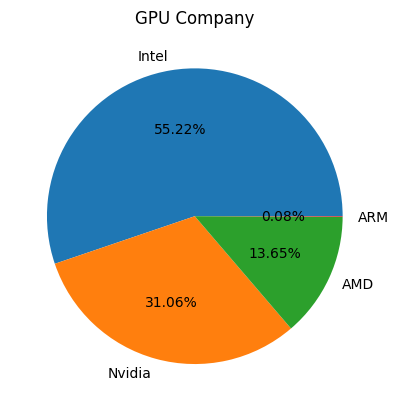

In [ ]:
# Company distribution
df['Company'].value_counts().plot(kind='bar'); plt.title('Company'); plt.show()

# OS distribution
df['OS'].value_counts().plot(kind='bar'); plt.title('Operating System'); plt.show()

# Touchscreen distribution
df['Touchscreen'].value_counts().plot(kind='pie', autopct='%.2f%%'); plt.title('Touchscreen'); plt.ylabel(""); plt.show()

# RAM distribution
df['Ram'].value_counts().sort_index().plot(kind='bar'); plt.title('RAM (GB)'); plt.show()

# GPU company
df['GPU_company'].value_counts().plot(kind='pie', autopct='%.2f%%'); plt.title('GPU Company'); plt.ylabel(""); plt.show()

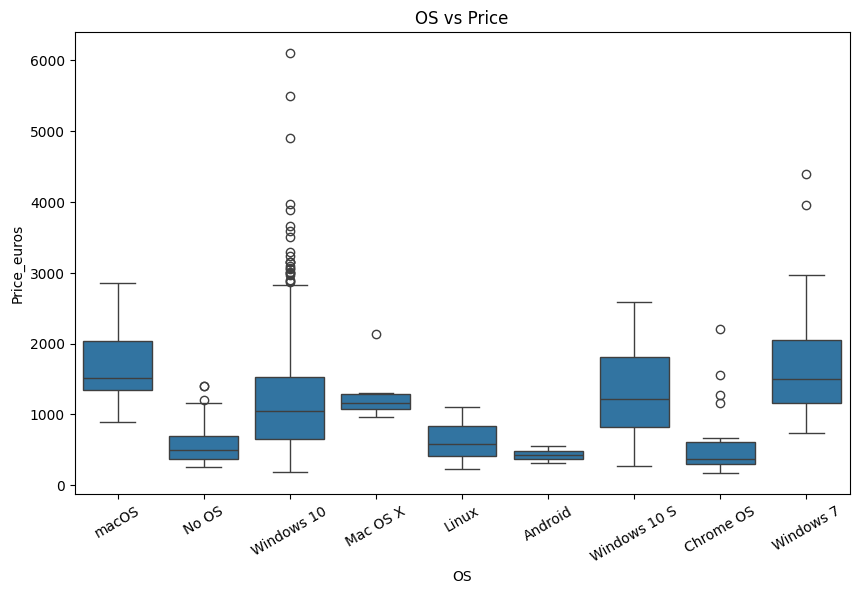

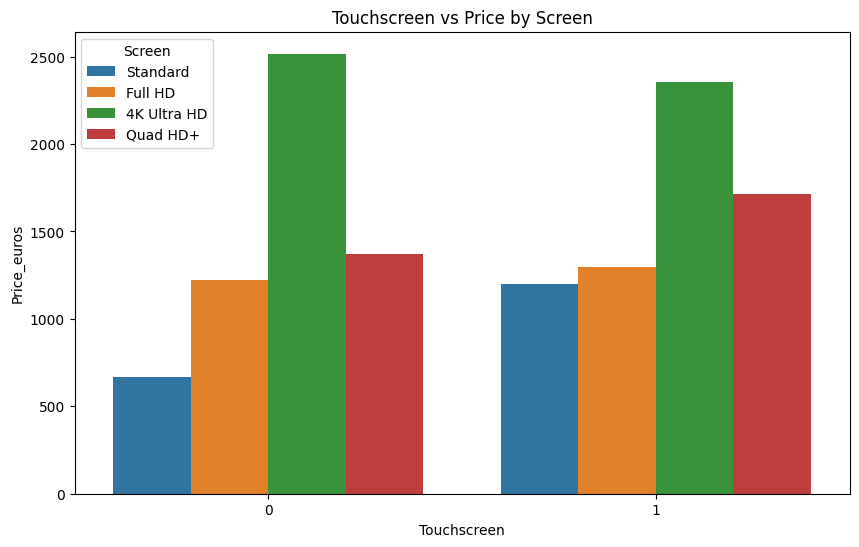

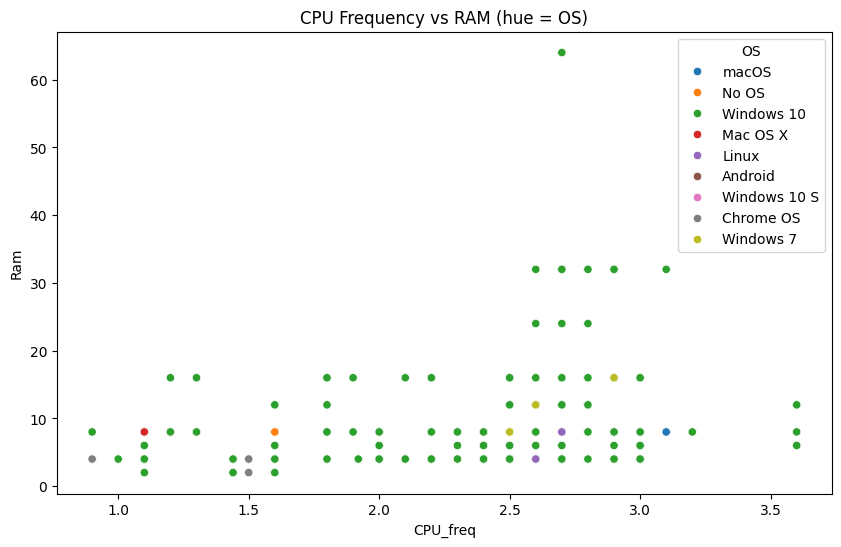

In [ ]:
# OS vs Price
plt.figure(figsize=(10,6))
sns.boxplot(x=df['OS'], y=df['Price_euros'])
plt.xticks(rotation=30)
plt.title("OS vs Price")
plt.show()

# Touchscreen vs Price (hue = Screen)
plt.figure(figsize=(10,6))
sns.barplot(x="Touchscreen", y="Price_euros", hue="Screen", data=df, errorbar=None)
plt.title("Touchscreen vs Price by Screen")
plt.show()

# CPU_freq vs RAM (scatter, hue = OS)
plt.figure(figsize=(10,6))
sns.scatterplot(x="CPU_freq", y="Ram", hue="OS", data=df)
plt.title("CPU Frequency vs RAM (hue = OS)")
plt.show()

MSE: 3935205.0204493245
R²: -6.9284578522792


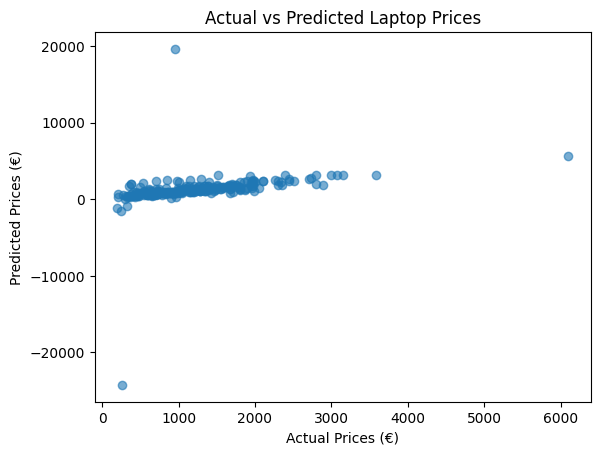

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Target
y = df["Price_euros"]

# Features
cat_cols = ["Company","Product","TypeName","OS","Screen","Touchscreen","IPSpanel","RetinaDisplay",
            "CPU_company","CPU_model","PrimaryStorageType","SecondaryStorageType","GPU_company","GPU_model"]
num_cols = ["Inches","Ram","Weight","ScreenW","ScreenH","CPU_freq","PrimaryStorage","SecondaryStorage"]

X = df[cat_cols + num_cols].copy()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices (€)")
plt.ylabel("Predicted Prices (€)")
plt.title("Actual vs Predicted Laptop Prices")
plt.show()

In [ ]:
df.to_csv("laptop_prices_cleaned.csv", index=False)

from google.colab import files
files.download("laptop_prices_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>